[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/amgp-upm/dl_course_chile/blob/main/2_LinearRegression.ipynb)

In [53]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

### Regresión lineal



**Model lineal**

Equación verdadera: $y=4x+2$

In [34]:
x = np.arange(11)
y = 4 * x + 2 

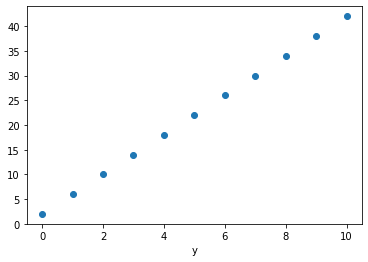

In [35]:
plt.scatter(x, y)
plt.xlabel('x')
plt.xlabel('y')
plt.show()

In [36]:
x_train = np.array(x, dtype=np.float32)
x_train = x_train.reshape(-1, 1) # Es necesario modificar la forma del vector
print(x_train.shape)

y_train = np.array(y, dtype=np.float32)
y_train = y_train.reshape(-1, 1) # Es necesario modificar la forma del vector
print(y_train.shape)

(11, 1)
(11, 1)


Ver el dispositivo disponible para hacer los cálculos.

In [37]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f'Forma de cálculo: {device}')

Forma de cálculo: cpu


Definición del modelo: $y_i=mx_i+b$

In [38]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim, bias=True):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim, bias=bias)  

    def forward(self, x):
        out = self.linear(x)
        return out

Incialización del modelo

In [48]:
input_dim = 1
output_dim = 1

torch.manual_seed(23)
model = LinearRegressionModel(input_dim, output_dim)

Función de coste a minimizar: 

MSE Loss: Mean Squared Error

$MSE=\frac{1}{n}\sum_i(\hat{y_i}-y_i)^2$

donde: $\hat{y_i}$ es la predicción del modelo y $y_i$ es el valor real (target).

In [49]:
criterion = nn.MSELoss()

Configuración del Optimizador

In [50]:
learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Entrenamiento del modelo

In [60]:
epochs = 100 # Número de épocas
pbar = tqdm(range(epochs))

losses = []

for epoch in pbar:
    # variables en el dispositivo
    inputs = torch.from_numpy(x_train).to(device) 
    labels = torch.from_numpy(y_train).to(device)

    # Se borran los gradientes con respecto a los parámetros
    optimizer.zero_grad() 

    # Inferencia del modelo para obtener las salidas
    outputs = model(inputs)

    # Calcular el coste
    loss = criterion(outputs, labels)

    # Obtener los gradientes con respecto a los parámetros
    loss.backward()

    # Actualizar los parametros
    optimizer.step()

    losses.append(loss.item())
    # Logging
    pbar.set_description(f'Epoch: {epoch + 1}, loss: {loss.item():.6f}')

Epoch: 100, loss: 0.001096: 100%|██████████| 100/100 [00:00<00:00, 215.02it/s]


In [58]:
print(f'Parámetros encontrados: w = {model.linear.weight.item()}, b={model.linear.bias.item()}')

Parámetros encontrados: w = 4.027256965637207, b=1.810726523399353


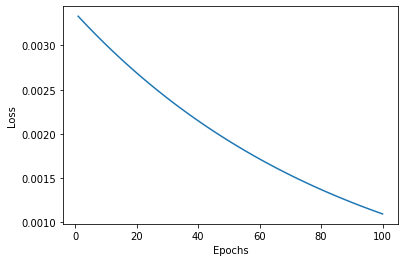

In [63]:
plt.plot(range(1, epochs + 1), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

Inferencia del modelo entrenado

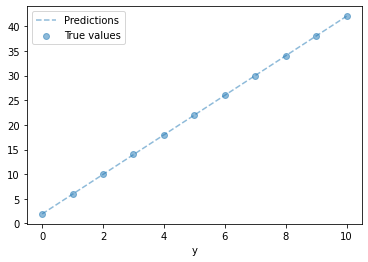

In [71]:
predicted = model(torch.from_numpy(x_train).requires_grad_()).data.numpy()
plt.scatter(x, y, label='True values', alpha=0.5)
plt.plot(np.squeeze(x_train), np.squeeze(predicted), '--', label='Predictions', alpha=0.5) 
plt.xlabel('x')
plt.xlabel('y')
plt.legend()
plt.show()